In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/university-employee-salaries-2011-present/higher_ed_employee_salaries.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/university-employee-salaries-2011-present/higher_ed_employee_salaries.csv')
df1.columns

Index(['Name', 'School', 'Job Description', 'Department', 'Earnings', 'Year'], dtype='object')

In [3]:
df1.head()

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012


In [4]:
df1.shape

(934348, 6)

In [5]:
average_job = df1['Job Description'].value_counts().sum()/len(df1['Job Description'].unique())
average_job

23.466390899689763

In [6]:
len(df1['Job Description'].unique())

38680

$Visualize$ $by$ $school$

In [7]:
df1['School'].value_counts()

School
The Ohio State University         424050
University of Toledo               79777
University Of Cincinnati           79021
Kent State University              68338
Ohio University                    59852
Miami University                   58712
Wright State University            40215
Youngstown State University        32891
Bowling Green State University     31119
University of Akron                24101
Cleveland State University         20876
Shawnee State University            8362
Central State University            7034
Name: count, dtype: int64

In [8]:
#Study the average to scale and study in each university:
average = df1['School'].value_counts().sum()/len(df1['School'].unique())
average

71872.92307692308

In [9]:
#we will pick top 3 school to visualize
#TOSU = The Ohio State University
df_TOSU = df1[df1['School'] == 'The Ohio State University']

#UOT = University of Toledo
df_UOT = df1[df1['School'] == 'University of Toledo']

#UOC = University of Cincinnati
df_UOC = df1[df1['School'] == 'University Of Cincinnati']

$Study$ $df$ $TOSU$

In [10]:
df_TOSU.shape

(424050, 6)

In [11]:
df_TOSU.isna().sum() #Resulting in Earning have 119 missing value. Consider the size of it, we will drop
df_TOSU = df_TOSU.dropna()
df_TOSU.shape

(423931, 6)

In [12]:
TOSU_valuecounts = df_TOSU.value_counts()
TOSU_filtered_Job_Description = len([count for count in TOSU_valuecounts if count > 5000]) #result in 14 job
job_TOSU14 = ([job for job, count in df_TOSU['Job Description'].value_counts().items() if count > 5000]
)

$Study$ $top$ $14$ $job$ $in$ $TOSU$

In [13]:
job_TOSU14

['Staff Nurse-B',
 'Patient Care Associate',
 'Lecturer',
 'Clinical Inst HS',
 'Professor',
 'Special Events Assistant 1',
 'Associate Professor',
 'Assistant Professor-Clinical',
 'Office Associate',
 'Patient Revenue Cycle Spclst',
 'Assistant Professor',
 'Post Doctoral Researcher',
 'Auxiliary Law Enforcement Ofcr',
 'Staff Nurse-A']

In [14]:
import random

def random_sample(df, jobs, num_samples_per_job):
    random.seed()
    df_copy = df[df['Job Description'].isin(jobs)]
    df_copy = df_copy.drop(['Name', 'School', 'Department', 'Year'], axis = 1)
    sample_df = df_copy.groupby('Job Description').apply(lambda x: x.sample(n=num_samples_per_job, replace=False))
    sample_df.reset_index(drop=True, inplace=True)
    return sample_df

In [15]:
def average(df):
    return df.groupby('Job Description').mean()

In [16]:
def dropfunc(df):
    return df.drop(['Name', 'School', 'Department', 'Year'], axis = 1)

In [18]:
average_sample1 = average(sample_df1)
average_sample2 = average(sample_df2)
average_sample3 = average(sample_df3)
average_sample4 = average(sample_df4)
average_sample5 = average(sample_df5)

In [19]:
average_sample3

,Earnings
Job Description,
Assistant Professor,101095.184970
Assistant Professor-Clinical,170242.078910
Associate Professor,117122.962600
Auxiliary Law Enforcement Ofcr,3005.515375
Clinical Inst HS,47895.419515
Lecturer,20611.783260
Office Associate,34008.101905
Patient Care Associate,19025.157955
Patient Revenue Cycle Spclst,33282.540810


In [20]:
sample_df6 = random_sample(df_TOSU, job_TOSU14, 5000)
allaverage = average(sample_df6)
allaverage

/tmp/ipykernel_18/2892841476.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df_copy.groupby('Job Description').apply(lambda x: x.sample(n=num_samples_per_job, replace=False))


,Earnings
Job Description,
Assistant Professor,101987.466822
Assistant Professor-Clinical,167151.272920
Associate Professor,116787.953972
Auxiliary Law Enforcement Ofcr,2892.708252
Clinical Inst HS,48340.249666
Lecturer,21027.360122
Office Associate,34180.770012
Patient Care Associate,19312.468226
Patient Revenue Cycle Spclst,33365.233520


In [21]:
#Check for outlier from the 14:
df_TOSU[df_TOSU['Job Description'] == 'Auxiliary Law Enforcement Ofcr']

,Name,School,Job Description,Department,Earnings,Year
1185,David M Pennington,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,2053.80,2013
1637,Jeffery A Gunn,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,4036.20,2013
1869,Mark A Kirkpatrick,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,2393.80,2013
1879,Mark A Kirkpatrick,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,2153.25,2014
1886,Mark A Kirkpatrick,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,3847.50,2015
...,...,...,...,...,...,...
933065,Rodney Allen Hart,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,2938.50,2017
933270,Jeffrey William Conrad,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,323.70,2017
933497,Bryan Kohler,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,923.10,2019
933649,Curtis McKnight Hundley,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,2065.85,2014


$Study$ $of$ $UOT$

In [22]:
df_UOT['Year'].value_counts()
#df_average_job = df_UOT['Year'].value_counts().sum()/(count for count in df['Job Description'])
(df_UOT['Job Description'].value_counts() < 500).sum()

4641

In [23]:
#Filtered_UOT
df_UOT_filtered = df_UOT[df_UOT['Job Description'].map(df_UOT['Job Description'].value_counts()) >= 500].reset_index()

In [24]:
df_UOT_filtered['Job Description'].value_counts()
#Take all the job
job_UOT = df_UOT_filtered['Job Description'].unique()

In [26]:
average_UOT1 = average(sample_UOT1)
average_UOT2 = average(sample_UOT2)
average_UOT3 = average(sample_UOT3)
average_UOT4 = average(sample_UOT4)
average_UOT5 = average(sample_UOT5)

$Study$ $of$ $UOC$

In [27]:
df_UOC.nunique()

Name               28820
School                 1
Job Description     6006
Department          1600
Earnings           36551
Year                  12
dtype: int64

In [28]:
df_UOC.isnull().sum() #result in 10 Job null, and 2290 null value in earning
df_UOC = df_UOC.dropna(subset=['Job Description', 'Earnings'])

In [29]:
(df_UOC['Job Description'].value_counts() > 500).sum() #result in 20 job so that is enough
df_UOC_filtered = df_UOC[df_UOC['Job Description'].map(df_UOC['Job Description'].value_counts()) >= 500].reset_index()

In [30]:
(df_UOC['Job Description'].value_counts() > 500).sum()

20

In [31]:
job_UOC = df_UOC_filtered['Job Description'].unique()

$Sample$ $UOC$

In [33]:
average_UOC1 = average(sample_UOC1)
average_UOC2 = average(sample_UOC2)
average_UOC3 = average(sample_UOC3)
average_UOC4 = average(sample_UOC4)
average_UOC5 = average(sample_UOC5)

$Study$ $All$ $Job$ $Description$

In [34]:
#Drop the df1 that its job description has count lower than average_count

In [35]:
average_count = df1['Job Description'].value_counts().mean()
counts = df1['Job Description'].value_counts()
mask = counts > average_count
filtered_index = counts[mask].index
df_copy = df1[df1['Job Description'].isin(filtered_index)].copy()

In [36]:
#top 20 job: 
top_20_job = df_copy['Job Description'].value_counts()[:20]
print(top_20_job)
top_20_df = df_copy[df_copy['Job Description'].map(lambda x: x in top_20_job)]

Job Description
Professor                       28204
Associate Professor             24831
Assistant Professor             18684
Staff Nurse-B                   18399
Lecturer                        15439
Patient Care Associate          12923
Faculty Part-Time -Semester     11835
Clinical Inst HS                10813
Custodial Worker                10807
Special Events Assistant 1       9737
Assistant Professor-Clinical     8027
Staff Nurse                      6782
Office Associate                 6575
Adjunct Instructor               6573
Patient Revenue Cycle Spclst     6532
Adjunct                          6428
Visiting Faculty                 5994
Senior Lecturer                  5897
Tenure Track Faculty 9 Month     5821
Program Coordinator              5778
Name: count, dtype: int64


In [37]:
average_earning = top_20_df.groupby('Job Description')['Earnings'].mean()

In [38]:
average_earning

Job Description
Adjunct                           7214.966442
Adjunct Instructor                8235.959834
Assistant Professor              79979.925957
Assistant Professor-Clinical    168001.526680
Associate Professor              99229.412328
Clinical Inst HS                 48483.370692
Custodial Worker                 25126.256104
Faculty Part-Time -Semester       5292.333181
Lecturer                         25223.798717
Office Associate                 34060.167649
Patient Care Associate           19069.048545
Patient Revenue Cycle Spclst     33394.850790
Professor                       139372.428736
Program Coordinator              38062.607177
Senior Lecturer                  47056.286958
Special Events Assistant 1        1187.758457
Staff Nurse                      49589.436391
Staff Nurse-B                    64522.883418
Tenure Track Faculty 9 Month     89730.509524
Visiting Faculty                  9879.113740
Name: Earnings, dtype: float64

In [39]:
average_earning_year = top_20_df.groupby(['Job Description', 'Year'])['Earnings'].mean()

In [40]:
average_earning_year_df = pd.DataFrame(average_earning_year)

In [41]:
average_earning_year_df

Earnings
Job Description  Year              
Adjunct          2011   8567.351363
                 2012   9636.032391
                 2013   5736.432910
                 2014   5595.045009
                 2015   6514.349273
...                             ...
Visiting Faculty 2018  10202.186273
                 2019  11632.328621
                 2020   9827.647494
                 2021   8576.499055
                 2022   9350.981754

[218 rows x 1 columns]

In [42]:
average_count = df1['Job Description'].value_counts().mean()
counts = df1['Job Description'].value_counts()
mask = counts > average_count
filtered_index = counts[mask].index
df_filtered = df1[df1['Job Description'].isin(filtered_index)].copy()

In [43]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
top_earning_job = df_filtered.groupby('Job Description')['Earnings'].mean()
top_earning_job = top_earning_job.sort_values(ascending = True)
pd.DataFrame(top_earning_job)


,Earnings
Job Description,
FB Gameday Personnel,217.22
VRCFA worker,267.59
Football Gameday Personnel,328.45
Tutor/Notetaker,347.57
BKB Gameday Personnel,351.62
...,...
Head Football Coach,468281.68
President,508560.82
Senior Vice President,588756.74


In [44]:
top_earning_job = top_earning_job.dropna() #delete any null value occur
#selected top 20 earning job:
top_20_earning = top_earning_job[-20:]

In [45]:
top_20_earning

Job Description
Certified Registered Nurse Anesthetist 3    233668.14
Director-Tenure Init Unit                   234759.33
Dean & Professor                            239058.51
Professor-Clinical                          241775.70
Chair                                       247434.67
Head Basketball Coach                       249430.55
Admin-Financial Services                    257211.15
Distinguished University Prof (9M)          263038.10
Dean                                        265586.91
Associate Executive Director                271259.45
Professor - Clinical                        290043.54
Assoc Vice Pres-Health Svcs                 316355.19
Head Men's Basketball Coach                 387048.64
Vice President                              390239.74
Vice Dean                                   408504.02
Assistant Coach-Major Sports                459901.27
Head Football Coach                         468281.68
President                                   508560.82
Senior Vice 

**Visualizing the graph**

Visualizing top 20 job among of it all

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Average Earnings by Job')

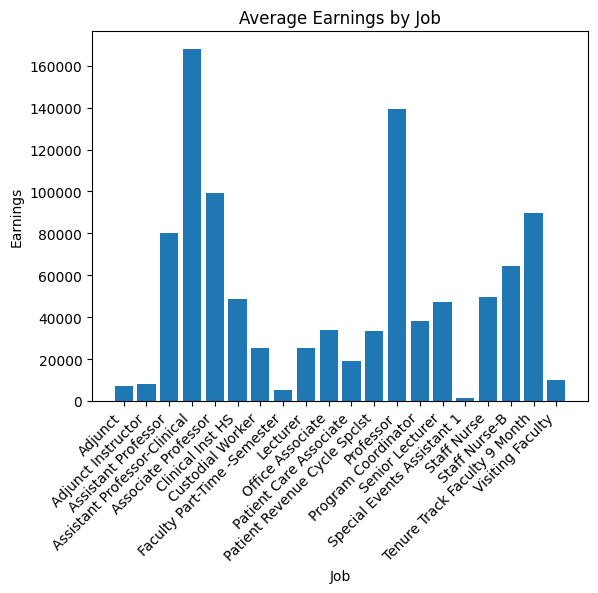

In [47]:
#job Description = index
fig, ax = plt.subplots()
ax.bar(average_earning.index, average_earning.values)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Job')
ax.set_ylabel('Earnings')
ax.set_title('Average Earnings by Job')

In [48]:
average_earning_year_df = pd.DataFrame(average_earning_year_df)
average_earning_year_df = average_earning_year_df.reset_index(drop = False)
average_earning_year_df = average_earning_year_df.set_index('Job Description')

In [49]:
#for job in top_20_job.index:
#    for earning in average_earning_year_df.index:
#        if(job == earning)
average_earning_year_df

,Year,Earnings
Job Description,,
Adjunct,2011,8567.35
Adjunct,2012,9636.03
Adjunct,2013,5736.43
Adjunct,2014,5595.05
Adjunct,2015,6514.35
...,...,...
Visiting Faculty,2018,10202.19
Visiting Faculty,2019,11632.33
Visiting Faculty,2020,9827.65


Top 20 job earning by year

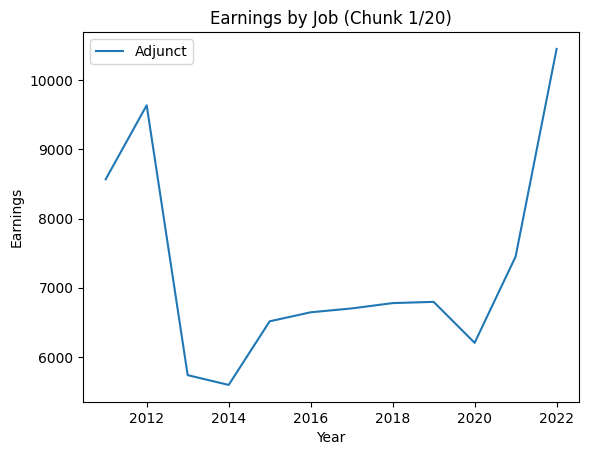

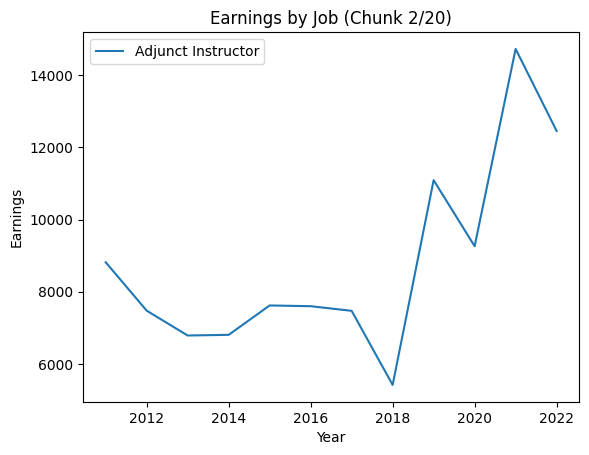

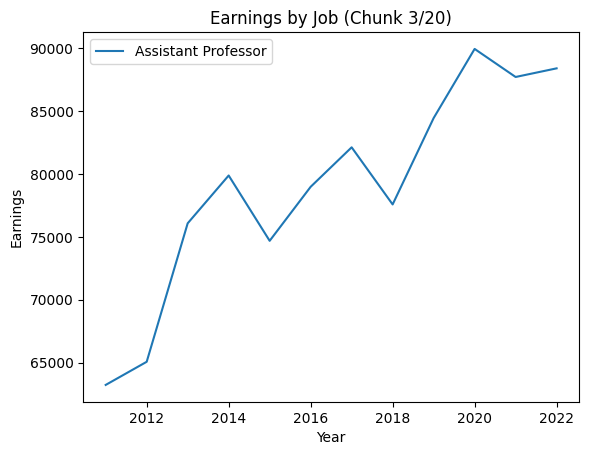

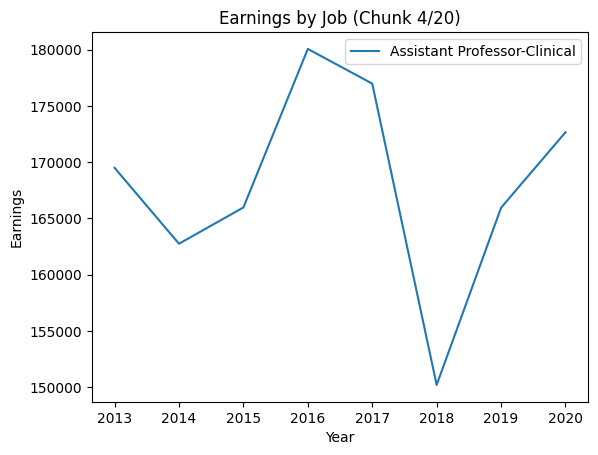

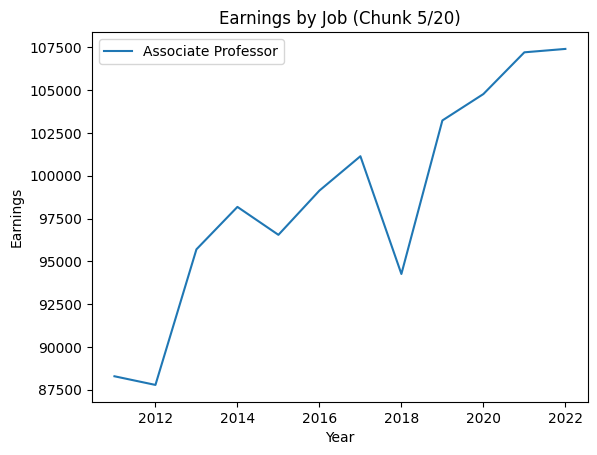

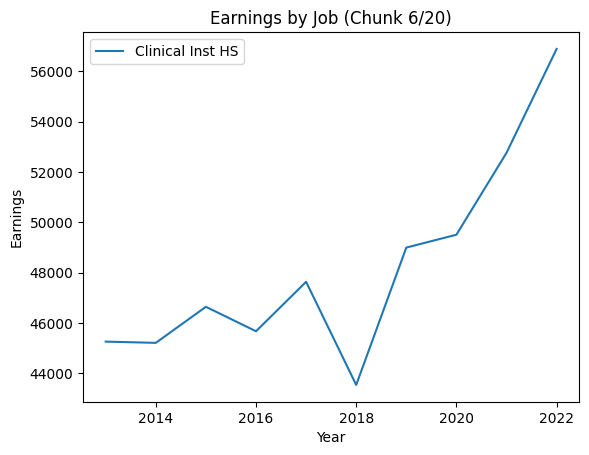

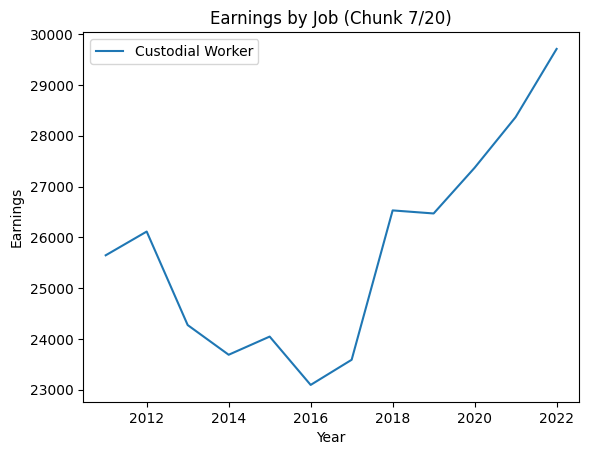

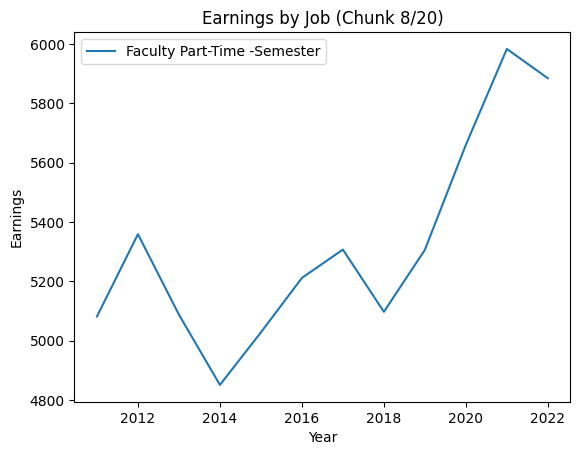

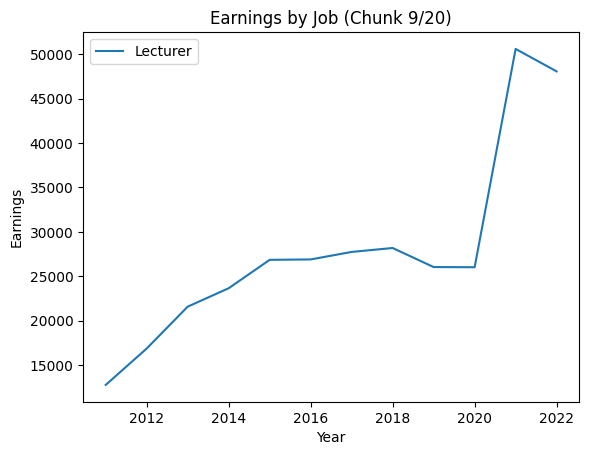

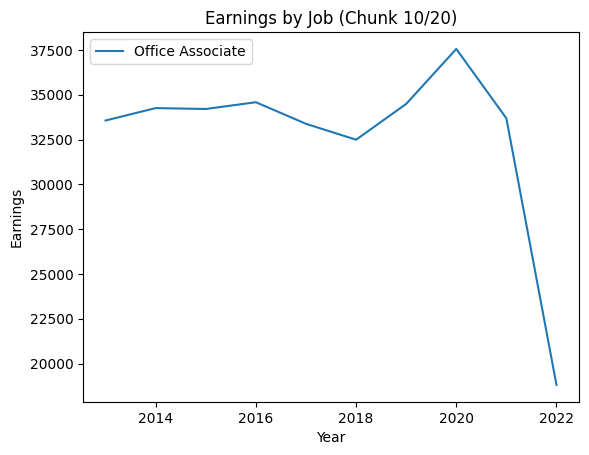

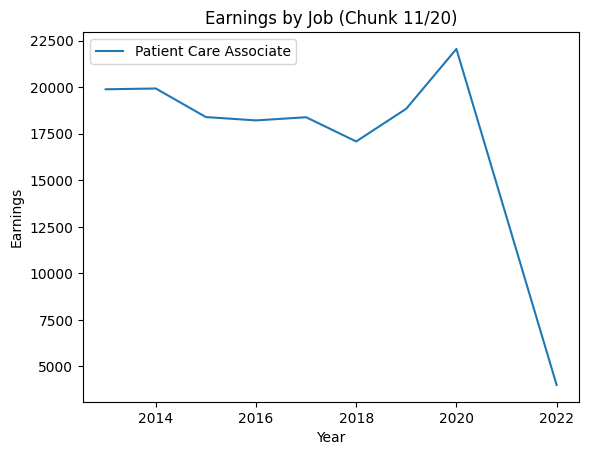

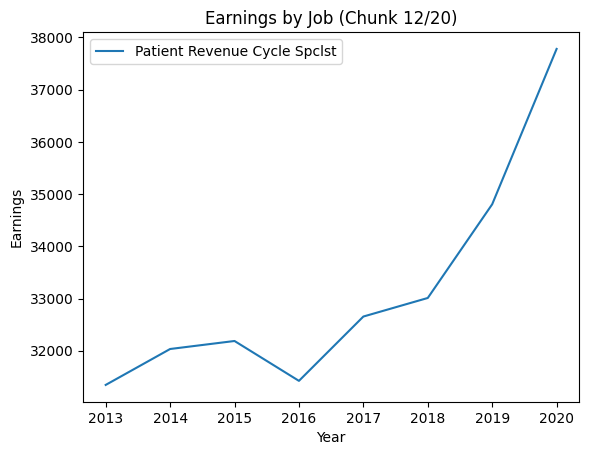

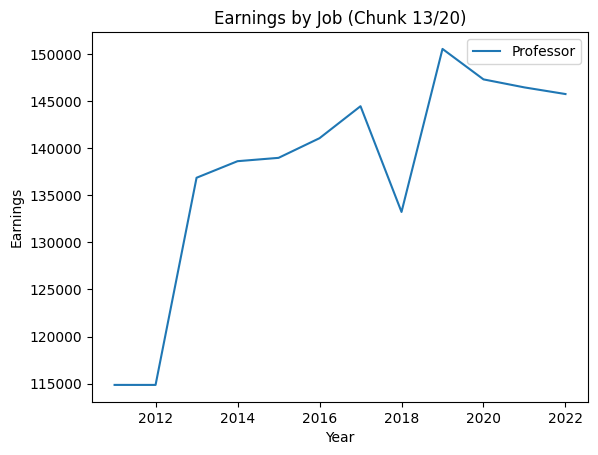

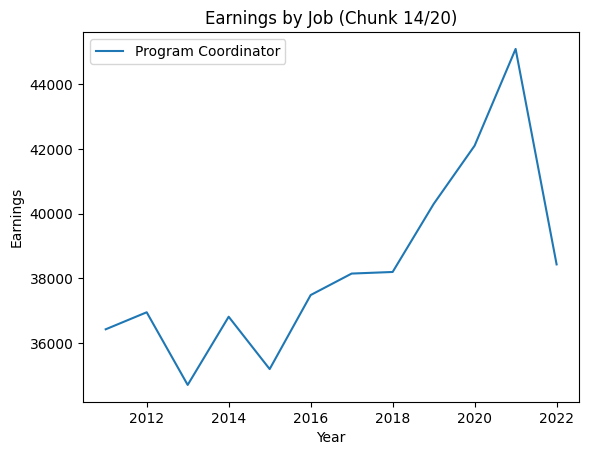

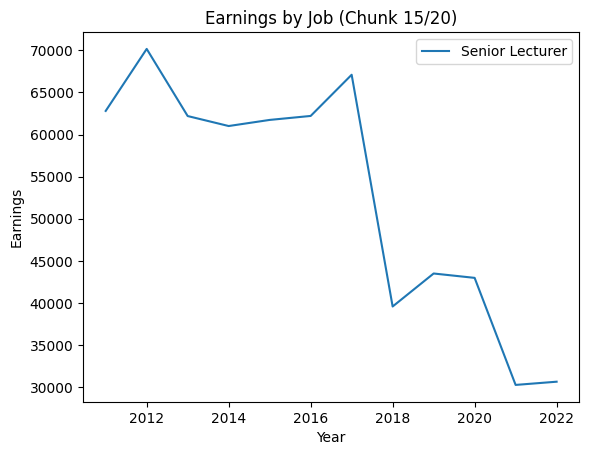

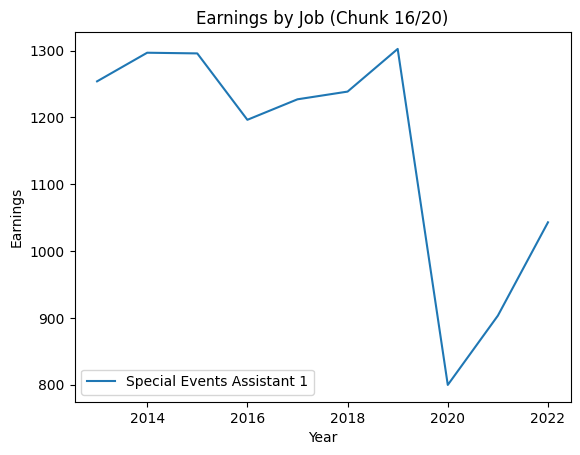

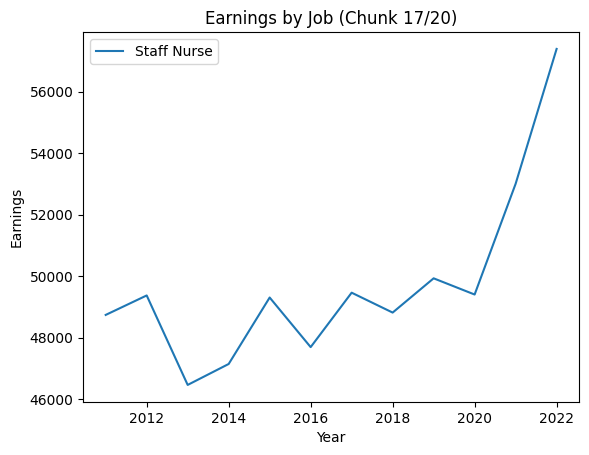

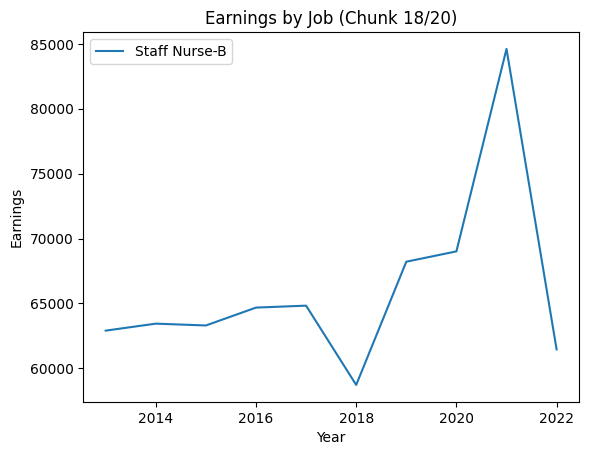

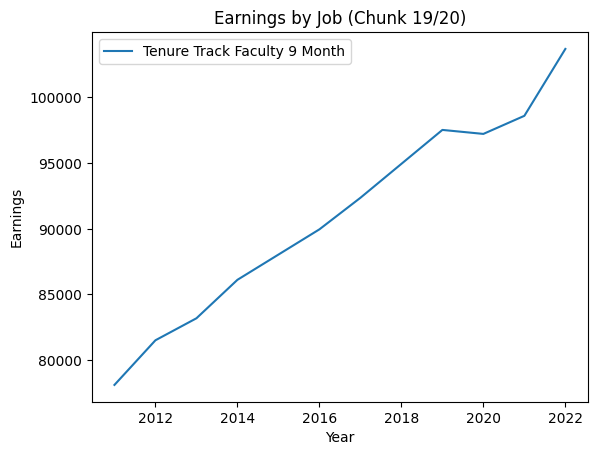

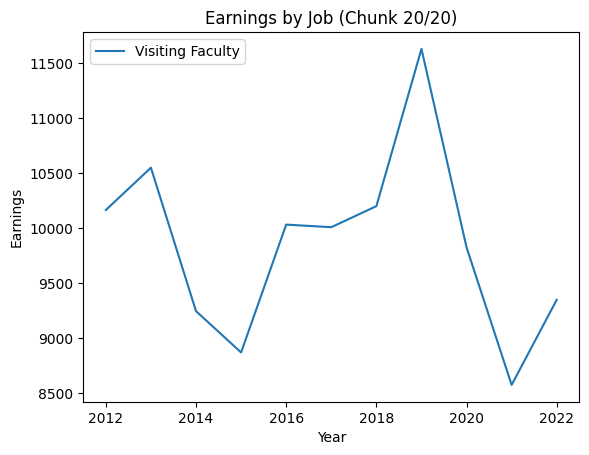

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Job Description', 'Year', and 'Earnings'

# Group the data by 'Job Description'
grouped =  average_earning_year_df.groupby('Job Description')

# Split the groups into chunks of 5 jobs
chunks = [group for _, group in grouped]

# Create separate line plots for each chunk
num_chunks = len(chunks)
for i in range(num_chunks):
    chunk = chunks[i]
    for name, group in chunk.groupby('Job Description'):
        plt.plot(group['Year'], group['Earnings'], label=name)
    
    # Set the axis labels and title
    plt.xlabel('Year')
    plt.ylabel('Earnings')
    plt.title(f'Earnings by Job (Chunk {i+1}/{num_chunks})')
    
    # Display the legend
    plt.legend()
    
    # Display the plot
    plt.show()

**Top 20 earning**

In [2]:
fig, ax = plt.subplots()
ax.bar(top_20_earning.index, top_20_earning.values)
plt.xticks(rotation = 45, ha = 'right')

NameError: name 'plt' is not defined